## Importing Libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('movies_dataset.csv')

In [11]:
df.head()

,title,1,2,3,4,5,6,7,8,9,...,601,602,603,604,605,606,607,608,609,610
0,10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
1,12 Angry Men (1957),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2001: A Space Odyssey (1968),0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,5.0,0.0,3.0,0.0,4.5
3,28 Days Later (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,5.0
4,300 (2007),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0,4.0


so we can see the dataset is made up of 2 things. First is the title of a movie and second is the rating that was given to it by various users. We will use this dataset to make a recommendation system.

## Data Preprocessing
Let us check if we have any NULL values in our data

In [12]:
total_null_values = df.isnull().sum().sum()
print(f'Total null values in the dataset: {total_null_values}')

Total null values in the dataset: 0


Let us confirm the datatypes of our rating's data.

In [22]:
data = df.drop(['title'], axis=1)
print(data.dtypes.unique())

[dtype('float64')]


All the ratings are of float type now let us check the spread of the ratings.

In [23]:
unique_values = data.stack().unique().tolist()
print(unique_values)

[0.0, 5.0, 3.0, 4.5, 4.0, 1.0, 3.5, 2.0, 2.5, 0.5, 1.5, 2.25]


so we can see that the ratings are spread from 0 to 5. Thus there are no errors in the data.

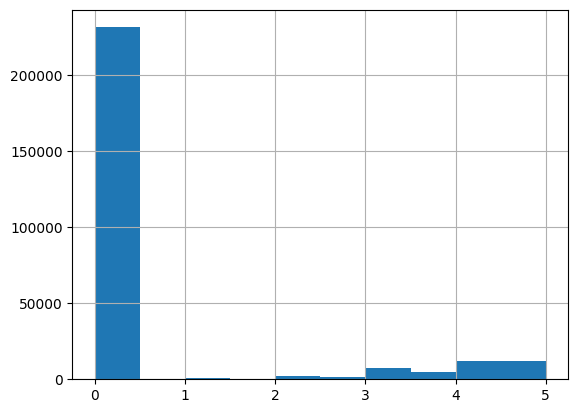

In [24]:
data.stack().hist()
plt.show()

we can see that mostly our ratings are 0 which means that most of the movies are not rated.

## Fitting the Model
Now we will fit our model using K Nearest Neighbors. We will use the cosine similarity as our metric. This is because we have a sparse matrix and cosine similarity works well with sparse matrices.

In [25]:
from sklearn.neighbors import NearestNeighbors
import joblib

# we fit 6 neighbors to find the 5 most similar movies
knn = NearestNeighbors(n_neighbors=6, metric='cosine')
knn.fit(data)

# save the model and the data
joblib.dump(knn, 'knn.pkl')
joblib.dump(df, 'data.pkl')

['data.pkl']

In [17]:
def recommend_movies(model, movie_name, data):
    movie_idx = data[data['title'] == movie_name].index[0]
    _, idx = model.kneighbors([data.drop(['title'], axis=1).iloc[movie_idx]])
    print(f'The top 5 recommended movies for {movie_name} are:') 
    for i in range(1, len(idx[0])):
        print(f'{i} - {data.iloc[idx[0][i]].title}')

In [29]:
import joblib
loaded_knn = joblib.load('knn.pkl')
loaded_data = joblib.load('data.pkl')
recommend_movies(loaded_knn, 'Star Wars: Episode V - The Empire Strikes Back (1980)', loaded_data)

The top 5 recommended movies for Star Wars: Episode V - The Empire Strikes Back (1980) are:
1 - Star Wars: Episode IV - A New Hope (1977)
2 - Star Wars: Episode VI - Return of the Jedi (1983)
3 - Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)
4 - Matrix, The (1999)
5 - Indiana Jones and the Last Crusade (1989)


c:\Users\muham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


So we can see that people that like Star wars are recommneded other movies from the franchise. This is a good sign that our model is working well. Moreover we can see that the movies that are recommended are also of the same genre. This is a good sign that our model is working well.

In [30]:
recommend_movies(loaded_knn, 'Indiana Jones and the Last Crusade (1989)', loaded_data)

The top 5 recommended movies for Indiana Jones and the Last Crusade (1989) are:
1 - Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)
2 - Indiana Jones and the Temple of Doom (1984)
3 - Star Wars: Episode V - The Empire Strikes Back (1980)
4 - Star Wars: Episode VI - Return of the Jedi (1983)
5 - Die Hard (1988)


c:\Users\muham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


here we can see that the Indiana Jones movies are being recommended more as compared to Star wars movies. This is a good sign that our model is working well.